# **Exploratory Data Analysis, ``SPY`` Option pricing**

We have the data for the call option price and stock price for ``SPY`` saved in CSV files ``spyCallsWrangled`` and ``spyWragled``, respectively. First, we set the package we need and retrieve the data. 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

We saved the stock price and call option price in a DataFrames called ``spyStock_raw``and ``spyCalls_raw``, respectively. 

In [8]:
spyStock_raw = pd.read_csv("spyWragled.csv")

spyCalls_raw = pd.read_csv("spyCallsWrangled.csv")

In [10]:
spyStock_raw.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Percent_change
0,0,2023-11-30,449.402930,450.665851,447.291468,450.310638,79752700,NaN
1,1,2023-12-01,449.689052,453.517290,449.087205,452.974640,89097900,-0.588113
2,2,2023-12-04,449.521348,452.994373,448.278150,450.596802,72430900,0.527709
3,3,2023-12-05,449.185908,451.484808,448.801097,450.508026,69793500,0.019706
4,4,2023-12-06,452.688518,452.718117,448.248558,448.692566,69124700,0.404611


In [61]:
spyCalls_raw.head()

,Unnamed: 0,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,0,2024-11-21 20:32:18,300.0,295.04,295.00,296.22,0.000000,0.000000,240.0,2.765628,True,REGULAR,USD,2024-11-25
1,1,2024-11-20 20:33:29,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,0.544926,True,REGULAR,USD,2024-11-25
2,2,2024-11-21 20:22:54,540.0,55.04,55.04,56.26,-0.379997,-0.685668,2.0,0.664554,True,REGULAR,USD,2024-11-25
3,3,2024-11-22 18:16:33,550.0,46.20,45.06,46.27,9.780003,26.853386,1.0,0.564457,True,REGULAR,USD,2024-11-25
4,4,2024-11-22 19:39:03,560.0,34.84,35.07,36.27,5.889999,20.345420,5.0,0.461675,True,REGULAR,USD,2024-11-25


We delete the columns ``Unnamed: 0`` in both DataFrames and call them ``spyStock`` and ``spyCalls``, respectively. 

In [16]:
spyStock = spyStock_raw.drop('Unnamed: 0', axis=1)

spyStock.head()

,Date,Open,High,Low,Close,Volume,Percent_change
0,2023-11-30,449.402930,450.665851,447.291468,450.310638,79752700,NaN
1,2023-12-01,449.689052,453.517290,449.087205,452.974640,89097900,-0.588113
2,2023-12-04,449.521348,452.994373,448.278150,450.596802,72430900,0.527709
3,2023-12-05,449.185908,451.484808,448.801097,450.508026,69793500,0.019706
4,2023-12-06,452.688518,452.718117,448.248558,448.692566,69124700,0.404611


In [18]:
spyCalls = spyCalls_raw.drop(['Unnamed: 0'], axis=1)

spyCalls.head()

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,2024-11-21 20:32:18,300.0,295.04,295.00,296.22,0.000000,0.000000,240.0,2.765628,True,REGULAR,USD,2024-11-25
1,2024-11-20 20:33:29,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,0.544926,True,REGULAR,USD,2024-11-25
2,2024-11-21 20:22:54,540.0,55.04,55.04,56.26,-0.379997,-0.685668,2.0,0.664554,True,REGULAR,USD,2024-11-25
3,2024-11-22 18:16:33,550.0,46.20,45.06,46.27,9.780003,26.853386,1.0,0.564457,True,REGULAR,USD,2024-11-25
4,2024-11-22 19:39:03,560.0,34.84,35.07,36.27,5.889999,20.345420,5.0,0.461675,True,REGULAR,USD,2024-11-25


### **Adding time difference between ``lastTradeDate`` and ``expirationDateCalls``.**

Add a column that have the time difference between lastTradeDate and expirationDateCalls


In [40]:
spyCalls['expirationDateCalls'] = pd.to_datetime(spyCalls['expirationDateCalls'])


# Convert 'lastTradeDate' to datetime format if it's not already
spyCalls['lastTradeDate'] = pd.to_datetime(spyCalls['lastTradeDate'])

# Format 'lastTradeDate' as date string
spyCalls['lastTradeDate'] = spyCalls['lastTradeDate'].dt.strftime('%Y-%m-%d')
spyCalls['lastTradeDate'] = pd.to_datetime(spyCalls['lastTradeDate'])

spyCalls['timeToCall'] = spyCalls['expirationDateCalls'] - spyCalls['lastTradeDate']

In [42]:
spyCalls.head()

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls,timeToCall
0,2024-11-21,300.0,295.04,295.00,296.22,0.000000,0.000000,240.0,2.765628,True,REGULAR,USD,2024-11-25,4 days
1,2024-11-20,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,0.544926,True,REGULAR,USD,2024-11-25,5 days
2,2024-11-21,540.0,55.04,55.04,56.26,-0.379997,-0.685668,2.0,0.664554,True,REGULAR,USD,2024-11-25,4 days
3,2024-11-22,550.0,46.20,45.06,46.27,9.780003,26.853386,1.0,0.564457,True,REGULAR,USD,2024-11-25,3 days
4,2024-11-22,560.0,34.84,35.07,36.27,5.889999,20.345420,5.0,0.461675,True,REGULAR,USD,2024-11-25,3 days


### **Marging the DataFrame on dates**

One of the important features that impact the option price is the price of the stock at the moment, so we merge both DataFrames on the dates. We do the left join between ``spyCalls`` and ``spyStock`` on ``lastTradeDate`` for ``spyCalss`` and on ``Date`` for ``spyStock``. We call the new DataFrame ``spyMerge``. 

In [44]:
spyStock['Date'] = pd.to_datetime(spyStock['Date'])
spyCalls['lastTradeDate'] = pd.to_datetime(spyCalls['lastTradeDate'])

spyMerged = pd.merge(spyCalls,spyStock, left_on='lastTradeDate', right_on='Date', how='left')
spyMerged.head()

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,openInterest,impliedVolatility,inTheMoney,...,currency,expirationDateCalls,timeToCall,Date,Open,High,Low,Close,Volume,Percent_change
0,2024-11-21,300.0,295.04,295.00,296.22,0.000000,0.000000,240.0,2.765628,True,...,USD,2024-11-25,4 days,2024-11-21,593.400024,595.119995,587.450012,593.669983,46750300.0,-0.533964
1,2024-11-20,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,0.544926,True,...,USD,2024-11-25,5 days,2024-11-20,590.380005,590.789978,584.630005,590.500000,50032600.0,-0.033872
2,2024-11-21,540.0,55.04,55.04,56.26,-0.379997,-0.685668,2.0,0.664554,True,...,USD,2024-11-25,4 days,2024-11-21,593.400024,595.119995,587.450012,593.669983,46750300.0,-0.533964
3,2024-11-22,550.0,46.20,45.06,46.27,9.780003,26.853386,1.0,0.564457,True,...,USD,2024-11-25,3 days,2024-11-22,593.659973,596.150024,593.150024,595.510010,38226400.0,-0.308983
4,2024-11-22,560.0,34.84,35.07,36.27,5.889999,20.345420,5.0,0.461675,True,...,USD,2024-11-25,3 days,2024-11-22,593.659973,596.150024,593.150024,595.510010,38226400.0,-0.308983


### **Dropping the columns that we don't need**

We want to process to feature selection for that reason we drop several columns that we do not need, and call the DataFrame ``test1``.

In [57]:
test1 = spyMerged.drop(['contractSize',	'currency',	'expirationDateCalls', 'lastTradeDate', 'Date', 'Open', 'High', 'Low', 'percentChange', 'Percent_change',], axis=1)

In [59]:
test1.head()

,strike,lastPrice,bid,ask,change,openInterest,impliedVolatility,inTheMoney,timeToCall,Close,Volume
0,300.0,295.04,295.00,296.22,0.000000,240.0,2.765628,True,4 days,593.669983,46750300.0
1,535.0,55.00,60.06,61.26,0.000000,1.0,0.544926,True,5 days,590.500000,50032600.0
2,540.0,55.04,55.04,56.26,-0.379997,2.0,0.664554,True,4 days,593.669983,46750300.0
3,550.0,46.20,45.06,46.27,9.780003,1.0,0.564457,True,3 days,595.510010,38226400.0
4,560.0,34.84,35.07,36.27,5.889999,5.0,0.461675,True,3 days,595.510010,38226400.0


### **Feature Selection**

We look at the correlation matrix, heatmap, and pair plot to make the decision regarding which features we want to use. 

In [62]:
corr_matrix = test1.corr()

In [64]:
corr_matrix

,strike,lastPrice,bid,ask,change,openInterest,impliedVolatility,inTheMoney,timeToCall,Close,Volume
strike,1.000000,-0.916058,-0.914769,-0.915972,-0.090526,0.118786,-0.530822,-0.701664,-0.026335,0.415040,-0.145445
lastPrice,-0.916058,1.000000,0.994787,0.996145,0.084532,-0.157855,0.591197,0.562563,0.259196,-0.396771,0.191940
bid,-0.914769,0.994787,1.000000,0.998419,0.075108,-0.160409,0.590457,0.564780,0.256074,-0.417728,0.203550
ask,-0.915972,0.996145,0.998419,1.000000,0.075206,-0.161649,0.588693,0.567715,0.263828,-0.418432,0.203545
change,-0.090526,0.084532,0.075108,0.075206,1.000000,-0.011012,0.140978,0.158538,-0.013609,0.075522,-0.101974
openInterest,0.118786,-0.157855,-0.160409,-0.161649,-0.011012,1.000000,-0.098821,-0.154612,-0.119287,0.117977,-0.127741
impliedVolatility,-0.530822,0.591197,0.590457,0.588693,0.140978,-0.098821,1.000000,0.407316,-0.101938,0.071153,0.042581
inTheMoney,-0.701664,0.562563,0.564780,0.567715,0.158538,-0.154612,0.407316,1.000000,-0.065241,-0.223815,0.114444
timeToCall,-0.026335,0.259196,0.256074,0.263828,-0.013609,-0.119287,-0.101938,-0.065241,1.000000,-0.217313,0.161457
Close,0.415040,-0.396771,-0.417728,-0.418432,0.075522,0.117977,0.071153,-0.223815,-0.217313,1.000000,-0.427595


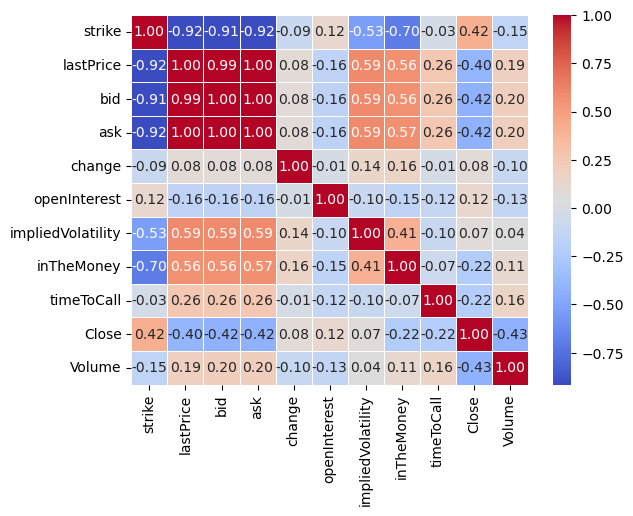

In [69]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

We drop ``ask`` and ``bid`` as they are naturally in a very high correlation with ``lastPrice``. 

In [72]:
test2 = test1.drop(['bid', 'ask'], axis=1)
test2.head()

,strike,lastPrice,change,openInterest,impliedVolatility,inTheMoney,timeToCall,Close,Volume
0,300.0,295.04,0.000000,240.0,2.765628,True,4 days,593.669983,46750300.0
1,535.0,55.00,0.000000,1.0,0.544926,True,5 days,590.500000,50032600.0
2,540.0,55.04,-0.379997,2.0,0.664554,True,4 days,593.669983,46750300.0
3,550.0,46.20,9.780003,1.0,0.564457,True,3 days,595.510010,38226400.0
4,560.0,34.84,5.889999,5.0,0.461675,True,3 days,595.510010,38226400.0


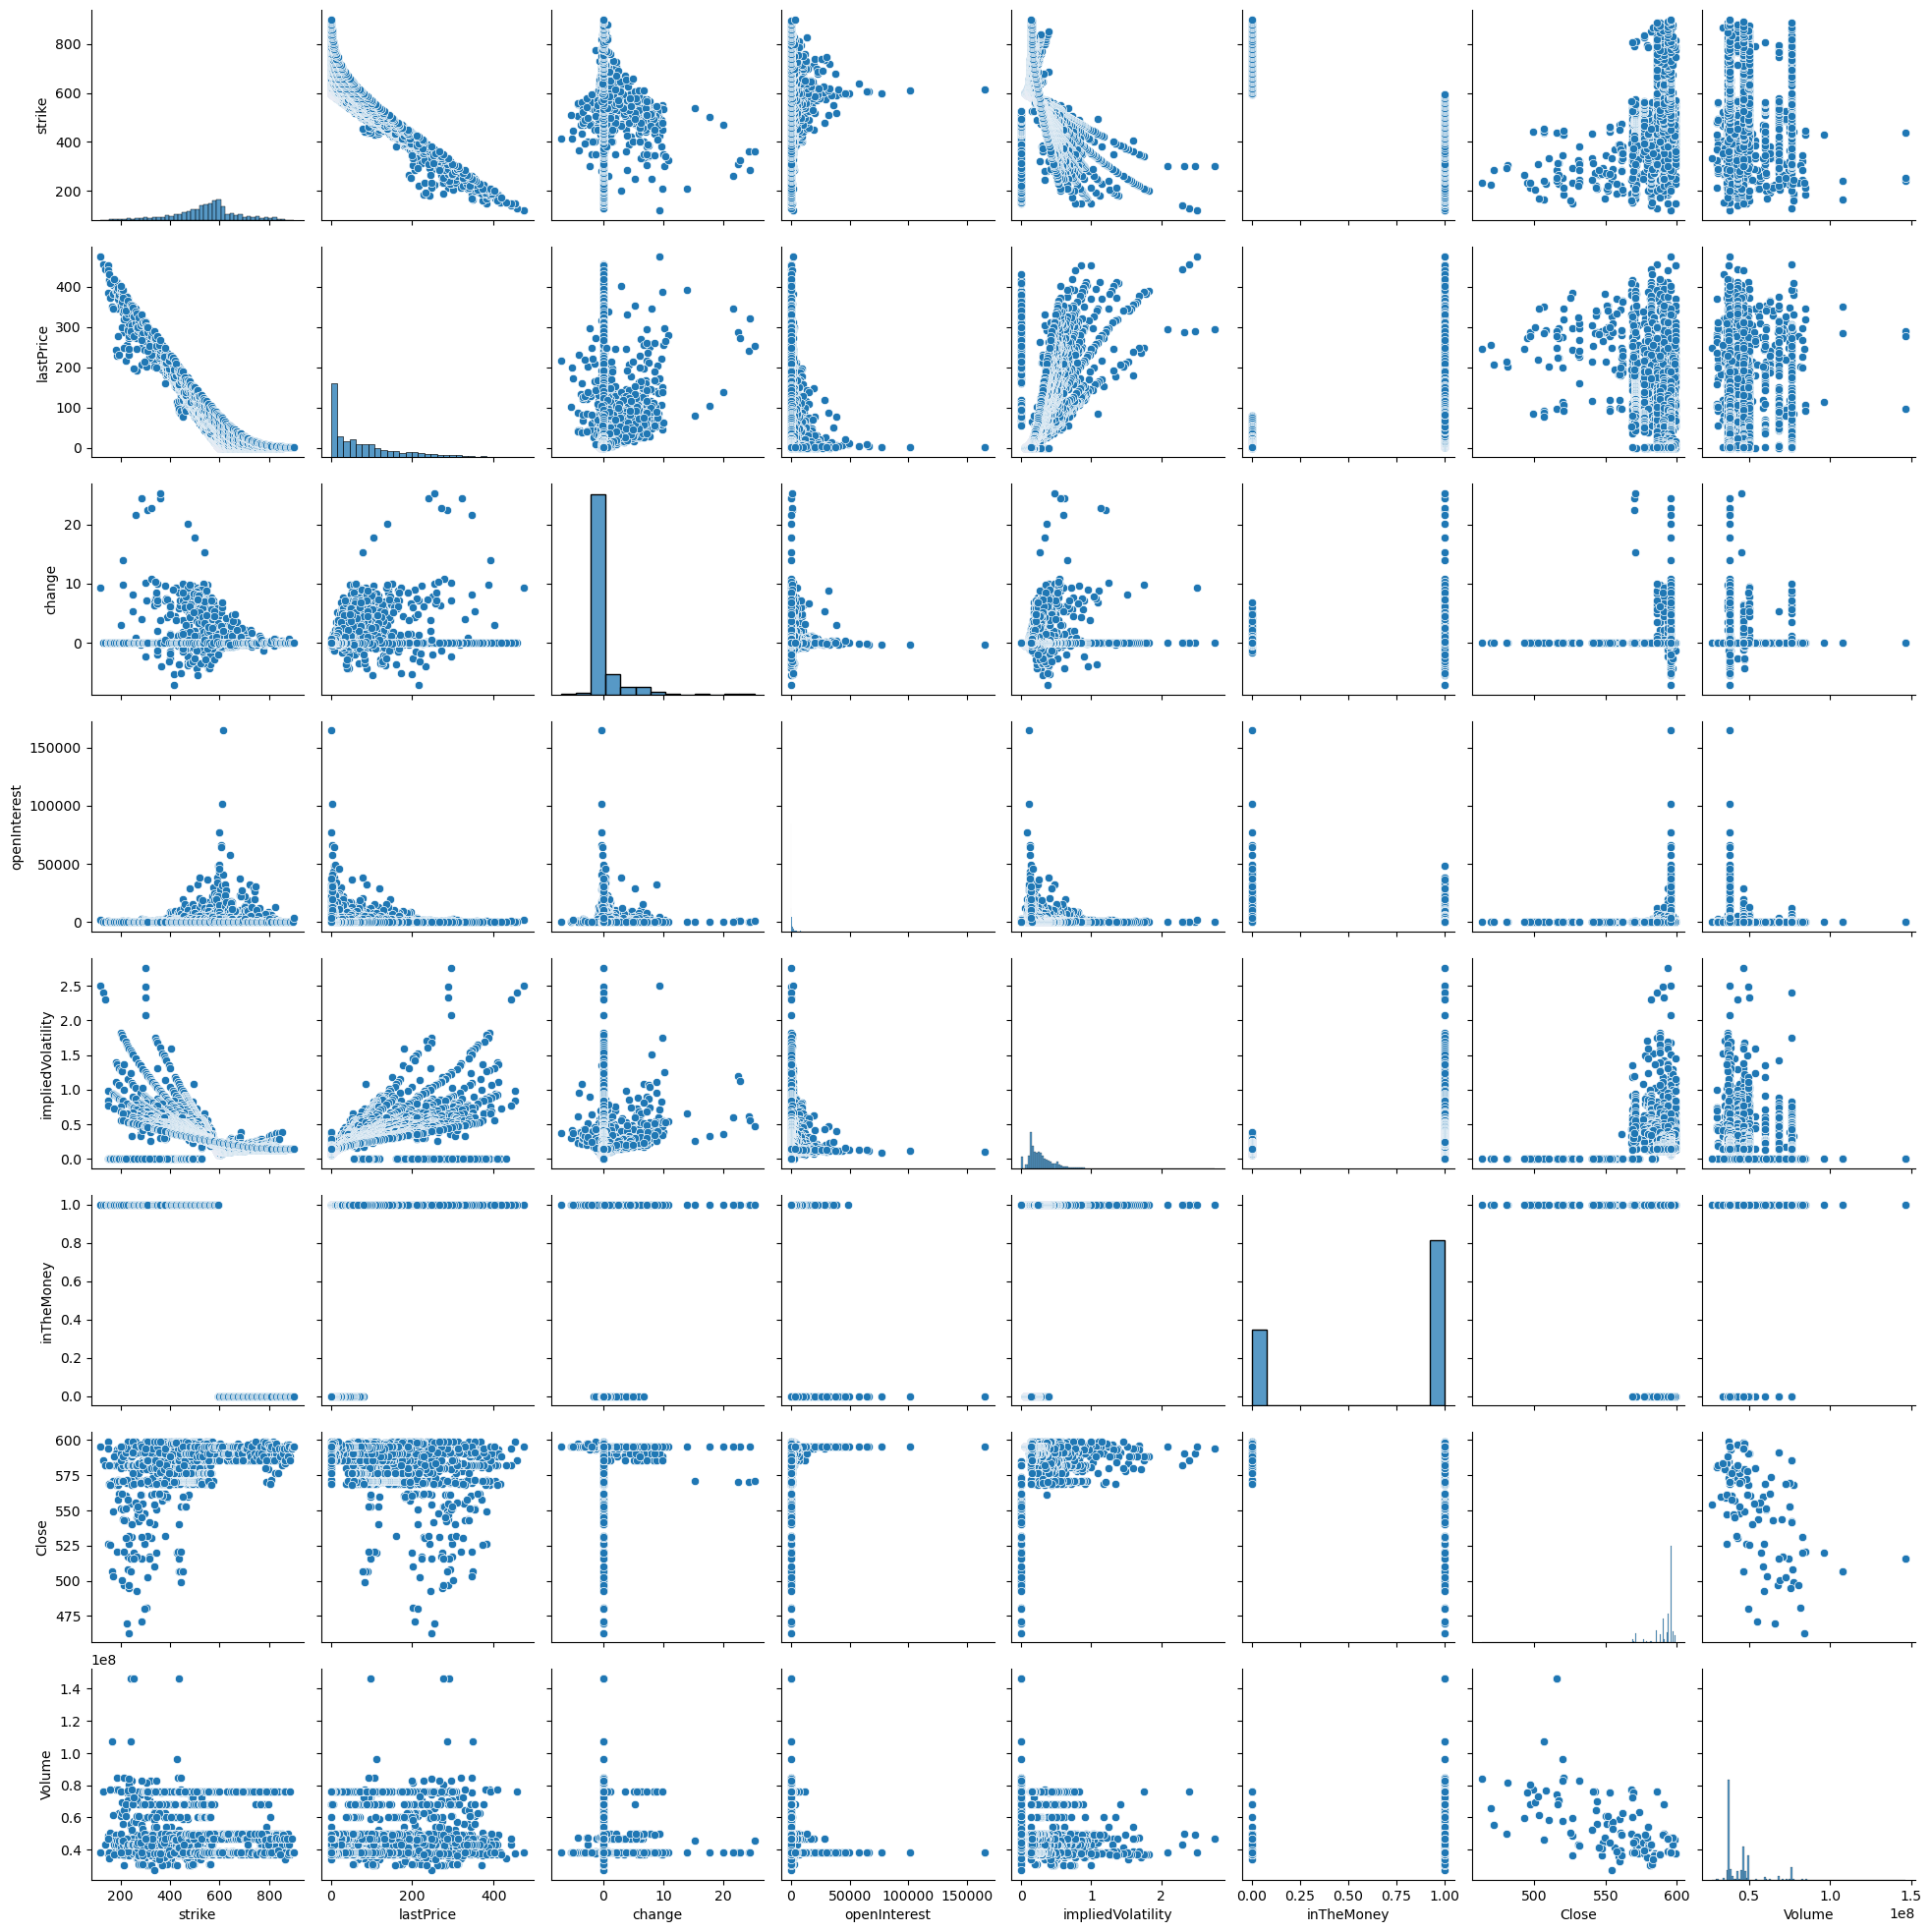

In [74]:
sns.pairplot(data = test2)
plt.show()

We save the data, and next, in the Feature Engineering section, we run Principal Component Analysis (PCA) to select the final set of features.  

In [83]:
test2.to_csv("edaSpy.csv")
